# Exercise Session 8 - Kernel SVM

## 1 Introduction

Welcome to the 7th exercise session of CS233 - Introduction to Machine Learning.  

We will continue using scikit-learn, which can be reviewed from the SVM exercise (week 5).

Let us use it to train SVMs with feature expansion and different kernel functions.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plots import plot, plot_expand, plot_expand_poly, plot_mykernel
from sklearn import svm
%load_ext autoreload
%autoreload 2

## 2 Kernel SVM

Beyond the linear problem we discussed before, SVM can also solve non-linear classification problems by using kernel functions. We replace $\mathbf{x}_i$ with $\phi(\mathbf{x}_i)$, and then $\mathbf{x}_i^T\mathbf{x}_j$ with $k(\mathbf{x}_i,\mathbf{x}_j)$. The **dual form** of the SVM training problem is then given by:  
\begin{align}
    \underset{\{\alpha_i\}}{\operatorname{max}} \ \ 
    & \sum_{i=1}^N \alpha_i - \frac 1 2 \sum_{i=1}^N\sum_{j=1}^N \alpha_i\alpha_jy_iy_jk(\mathbf{x}_i,\mathbf{x}_j)  \\   
    \operatorname{subject \ to} & \ \ \sum_{i=1}^N \alpha_iy_i = 0 \\
                 & \ \ 0 \leq \alpha_i \leq C, \forall i \ \ 
\end{align}
**Questions**
   * How can you write $\tilde{\mathbf{w}}$ using the $ \alpha_{i}$ s and the function $\phi$? `Answer` :$\tilde {\mathbf{w}} = \sum_{i=1}^N \alpha_i y_i \phi(x_i)$
   * How is $y(\mathbf{x})$ represented using the $\alpha_i$ s? `Answer` :$y(\mathbf{x}) = \sum_{i\in \delta} \alpha_i y_i k(\mathbf{x}_i, \mathbf{x}) + \mathbf{w}^{(0)}$

   
Have a look at the SVM function [here.](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) The main parameters you should look for are:
- Kernel Function: Linear, Polynomial and RBF 
    - Linear: `linear` $\langle {\bf x}_i, {\bf x}_j \rangle $.
    - Polynomial: `poly` $( \gamma \langle {\bf x}, {\bf x}' \rangle + c)^d $. $d$ is specified by the keyword `degree`, $c$ by `coef0`.
    - RBF: `rbf` $\exp(- \gamma \|{\bf x} - {\bf x}'\|^2)$. $\gamma$ is specified by the keyword `gamma` and must be greater than 0.
    
    Above, ${\bf x}$ and ${\bf x}'$ are data samples, and $\langle \cdot, \cdot \rangle$ indicates a dot product.
- Penalty term: C 
- Gamma: for the RBF and polynomial kernel
- Degree: for the polynomial kernel


### 2.1 Linearly-separable data

Let us look back at the linearly-separable data from exercise 5. This time, let's use an SVM again but with different kernels.

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


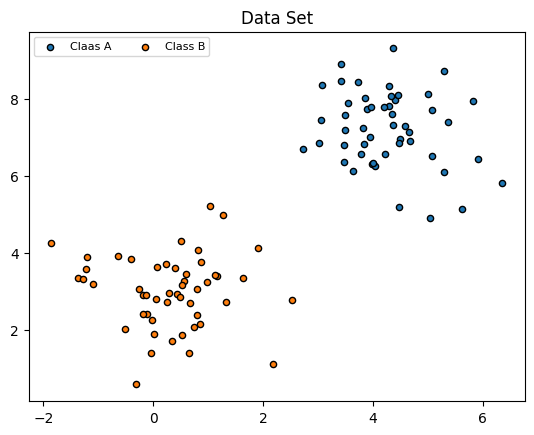

In [2]:
from helpers import get_simple_dataset

# Get the simple dataset
X_linear, Y_linear = get_simple_dataset()
plot(X_linear, Y_linear, None, dataOnly=True)

#### - Linear SVM
Firstly, we can use a linear kernel.

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


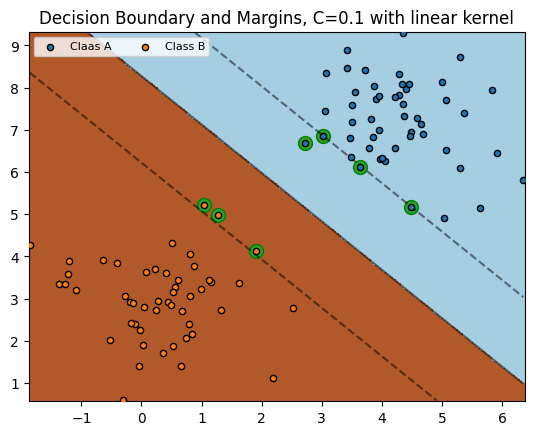

In [3]:
# Use an SVM with a linear kernel and set C=0.1
# You can also try some other C values and see what happens
clf = svm.SVC(kernel='linear', C=0.1)

# Call the fit method
clf.fit(X_linear, Y_linear)

# Plot the decision boundary and the support vectors
plot(X_linear, Y_linear, clf)


The above plot shows the decision boundary and margins of the learnt model. The circled points are the support vectors.

#### - Polynomial and RBF kernels 
We can then try to use Polynomial and RBF kernels. Have a look at the shape of the resulting decision boundary.

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


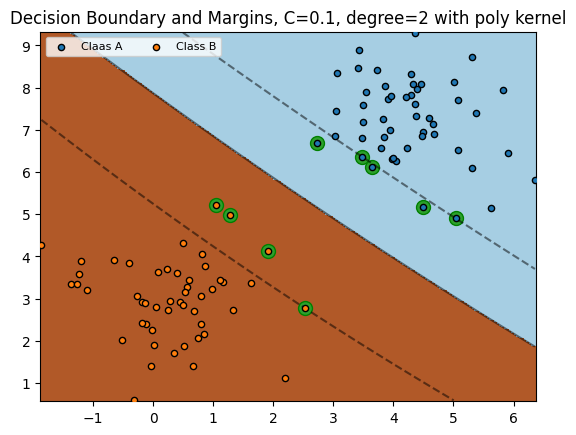

In [8]:
# Use an SVM with a polynomial kernel and set C=0.1, degree=2
# You can also try some other C and degree values and see what happens

### CODE HERE ###
clf = svm.SVC(kernel='poly', C=0.1, degree=2)

clf.fit(X_linear, Y_linear)
plot(X_linear, Y_linear, clf)

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


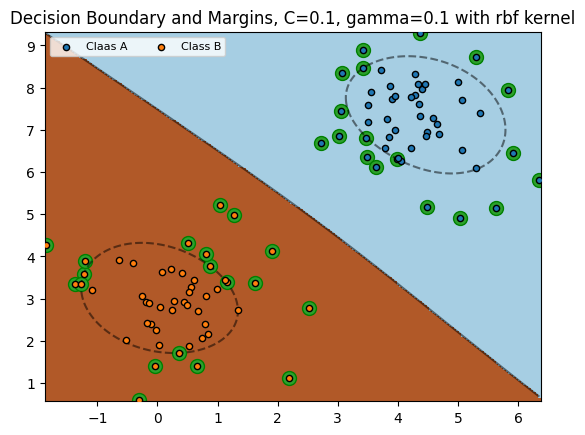

In [10]:
# Use an SVM with an RBF kernel and set C=0.1, gamma=0.1 , 
# You can also try some other C and gamma values and see what happens

### CODE HERE ###
clf = svm.SVC(kernel='rbf', C=0.1, gamma=0.1)

clf.fit(X_linear, Y_linear)
plot(X_linear, Y_linear, clf)


Since the data is linearly separable, kernel methods are unnecessary in this case. How about for non-linearly separable data?

### 2.2 Non-Linearly separable data
Until now we have worked with linearly-seperable data in the input feature space. Most of the time, this won't be the case. Let us now look at non-linear data and use non-linear kernels classify it. These kernels implicitly project the data to a higher dimensional space where the classes can be linearly separated.

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


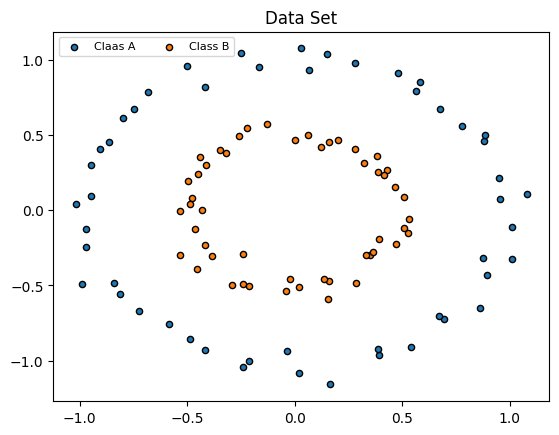

In [11]:
from helpers import get_circle_dataset

X,Y = get_circle_dataset()
plot(X,Y,None,dataOnly=True)

#### - Linear SVM
Is a linear SVM able to classify the data? 

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


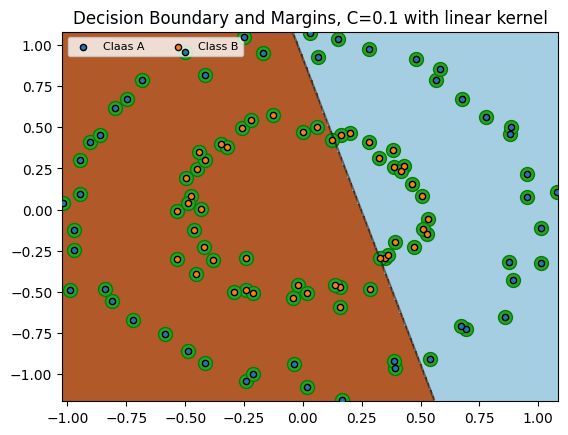

In [14]:
# Use a linear SVM
### CODE HERE ###
clf_linear = svm.SVC(kernel='linear', C=0.1)
    
clf_linear.fit(X, Y)
plot(X, Y, clf_linear)

Linear SVM fails on this non-linear dataset.

#### - Polynomial feature expansion

Now, we would like to perform an explicit polynomial feature expension to project the data to higher dimension so that it can be classified linearly. 

Fill in the function `expand_X()`. You should add a bias term, but **omit the interaction terms**. For example:

For $D=2$, $\text{degree\_of\_expansion}=2$ you have:
$$
\mathbf{x_i} = \begin{bmatrix}\mathbf{x}_i^{(1)}& \mathbf{x}_i^{(2)}\end{bmatrix}
$$
After the polynomial feature expansion, you would like to have:
$$ 
\mathbf{\phi}(\mathbf{x}_i) = \begin{bmatrix}1 & \mathbf{x}_i^{(1)} & \mathbf{x}_i^{(2)} & (\mathbf{x}_i^{(1)})^2 & (\mathbf{x}_i^{(2)})^2 \end{bmatrix}
$$

In [43]:
# Solution derivation testing
test = np.array([[1,2], [3,4], [5,6]])
print(test)
print(np.concatenate([test**i for i in range(3)],axis=1)[:,1:])

[[1 2]
 [3 4]
 [5 6]]
[[ 1  1  2  1  4]
 [ 1  3  4  9 16]
 [ 1  5  6 25 36]]


In [48]:
def expand_X(X, degree_of_expansion):
    """  Perform degree-d polynomial feature expansion of X, 
         with bias but omitting the interaction terms
    
    Args:
        X (np.array): data, shape (N, D).
        degree_of_expansion (int): The degree of the polynomial feature expansion.
    
    Returns:
        (np.array): Expanded data of shape (N, new_D), 
                    where new_D is D*degree_of_expansion+1
    
    """
    expanded_X = np.ones((X.shape[0],1))
    ### CODE HERE ###
    expanded_X = np.concatenate([X**i for i in range(degree_of_expansion+1)], axis=1)
    return expanded_X[:, 1:]

The original data has 2 features.
After degree-2 polynomial feature expansion (with bias, without interaction terms) the data has 5 features.


/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:192: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:194: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


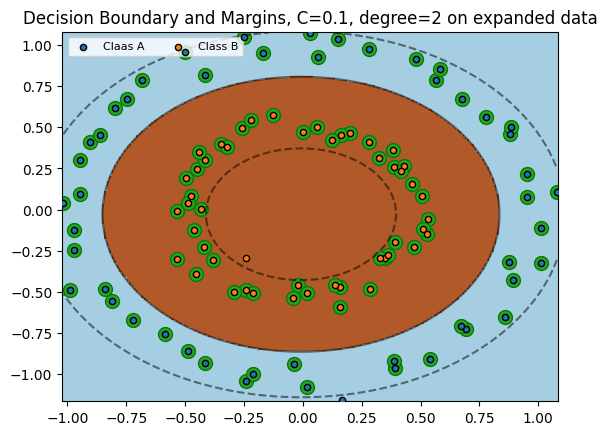

In [76]:
# polynomial feature expansion without the interaction terms
degree_of_expansion = 2
expanded_X = expand_X(X, degree_of_expansion)

print("The original data has {} features.".format(X.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, without interaction terms) the data has {} features.".format(degree_of_expansion,expanded_X.shape[1]))

# Use a linear SVM on the expanded features with C=10.0
### CODE HERE ###
expanded_clf = svm.SVC(kernel='linear', C=10)
expanded_clf.fit(expanded_X, Y)

plot_expand(X, Y, expanded_clf, degree_of_expansion)


Now, the non-linear data can be classified by a linear SVM.

#### - Polynomial and RBF Kernels 

Now, we will use polynomial and RBF kernels. First, let's implement the polynomial kernel, which is defined as 'poly' below.

- poly: $( \gamma \langle X, X' \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`.

In [62]:
# Compute your own polynomial kernel
def my_poly_kernel(X, Xprime, degree=3, gamma=1.0, coef0=1.0):
    """  Compute a degree-d polynomial kernel matrix between two sets of data X and Xprime 
    Args:
        X (np.array): data, shape (N1, D).
        Xprime (np.array): data, shape (N2, D).
        degree (int): The degree of the polynomial kernel method.
    Returns:
        K (np.array): the kernel matrix from data matrices; that matrix should be an array of shape (N1, N2).    
    """
    ### CODE HERE ###
    K = (gamma * (X @ Xprime.T) + coef0) ** degree
    return K

Considering the polynomial feature expansion with **the interaction terms** by using [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html):

**Question a**  What are the differences between polynomial feature expansion and a polynomial kernel? <br>
`Answer`: The polynomial feature expansion, expands the dimension of the input dataset, by creating combinations of original features with various degrees. This allows the data points to become separable in a higher dimension of features, but this approach increases the computation resources, required to train and fit the model. The polynomial kernel achieves the same separation, without replicating combinations of original features, instead computing the polynomial of certain degree of the dot product between 2 data samples. This allow to take into account the higher dimension combinations, without explicitly creating and storing them in the input dataset.

**Question b**  Is the SVM trained with a linear kernel on the polynomial-expanded data the same as the SVM trained with a polynomial kernel on the original data? <br>
`Answer`: The 2 trained Support Vector Machines should conclude the same model and performance, as the polynomial kernel reproduces the same effects as a polynomial expansion with linear kernel.

Now, let's check our implementation of polynomial kernel and find out the answer to Question b.

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


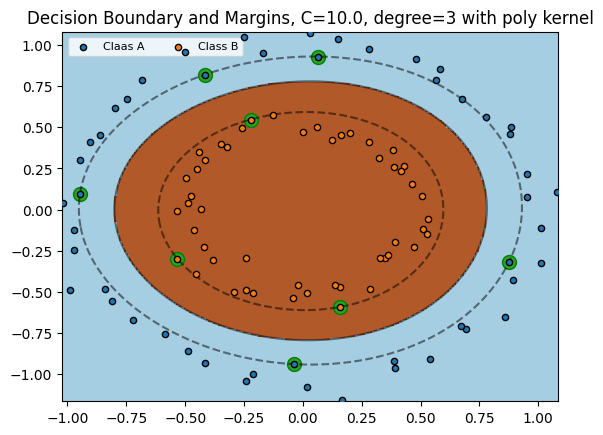

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:247: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:249: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


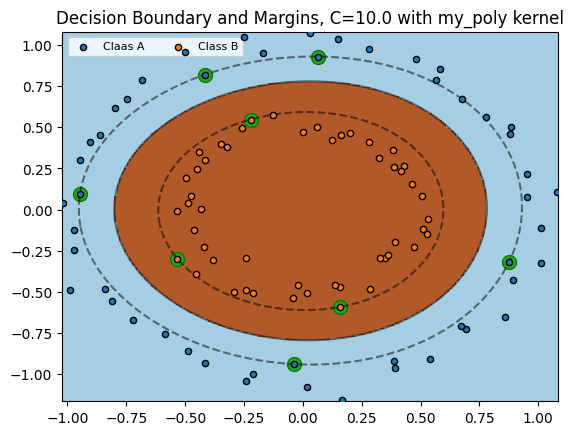

The original data has 2 features.
After degree-3 polynomial feature expansion (with bias, with interaction terms) the data has 10 features.


/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:137: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:139: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


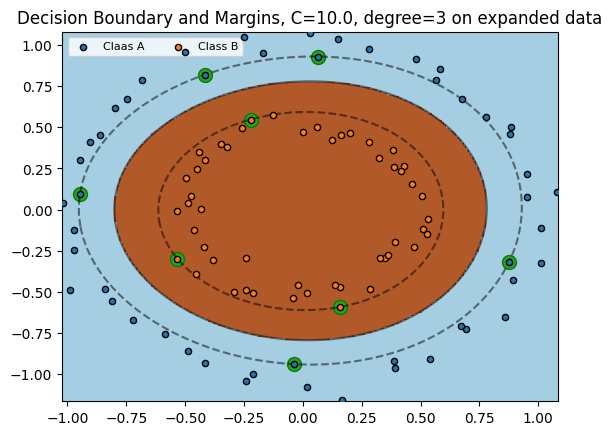

In [63]:
# These three SVMs should be same.

degree_of_expansion = 3

# Baseline: 
# Use an SVM with a polynomial kernel on the original features with C=10.0, gamma=1.0, coef0=1.0
### CODE HERE ###
clf = svm.SVC(kernel='poly', C=10.0, gamma=1.0, coef0=1.0)
clf.fit(X,Y)

plot(X, Y, clf)

# Use an SVM with your own kernel function (my_poly_kernel), which should give the same results as the previous method when using same parameters
### CODE HERE ###
    # tip: kernel=my_poly_kernel
kernel_clf = svm.SVC(kernel= my_poly_kernel, C=10.0, gamma=1.0, coef0=1.0)
kernel_clf.fit(X,Y)

plot_mykernel(X, Y, kernel_clf)

# Use an SVM with a linear kernel on the expanded features with C=10.0
## Use PolynomialFeatures to generate the expanded features with the interaction terms
from sklearn.preprocessing import PolynomialFeatures
### CODE HERE ###
poly = PolynomialFeatures(degree_of_expansion)
poly_expanded_X = poly.fit_transform(X)

print("The original data has {} features.".format(X.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, with interaction terms) the data has {} features.".format(degree_of_expansion,poly_expanded_X.shape[1]))

## Use an SVM with a linear kernel on the expanded features with C=10.0
### CODE HERE ###
poly_expanded_clf = svm.SVC(kernel='linear' ,C=10.0)
poly_expanded_clf.fit(poly_expanded_X, Y)

plot_expand_poly(X, Y, poly_expanded_clf, degree_of_expansion)


Let's play with different settings for different kernels.

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


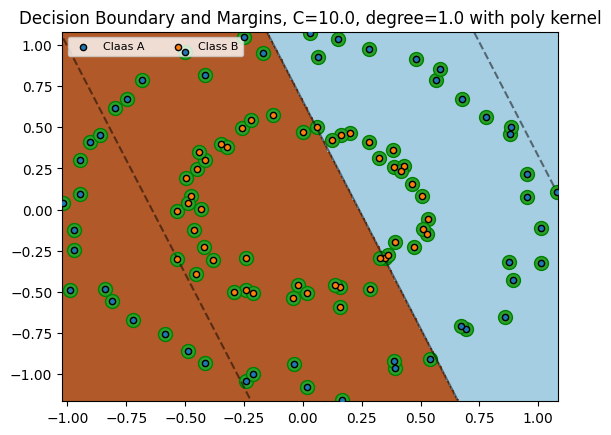

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


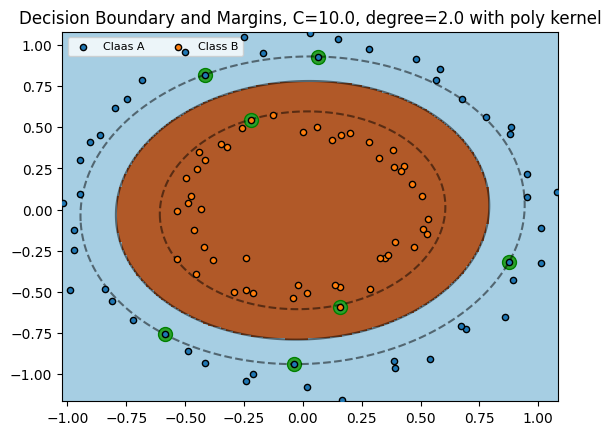

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


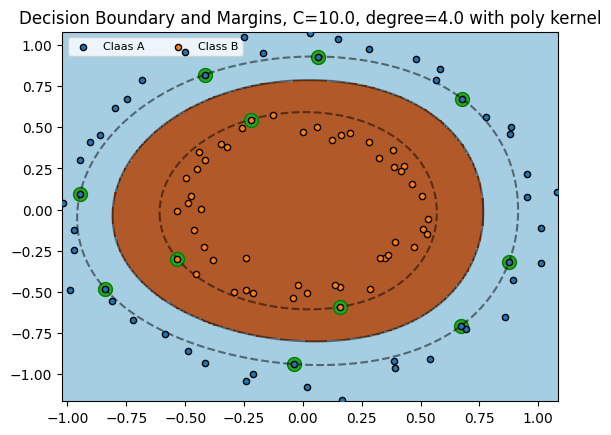

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


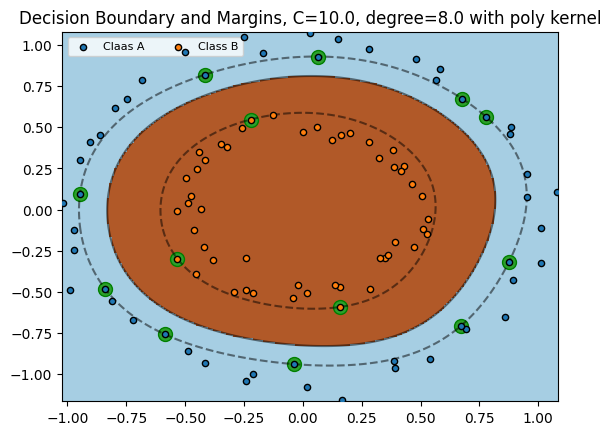

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


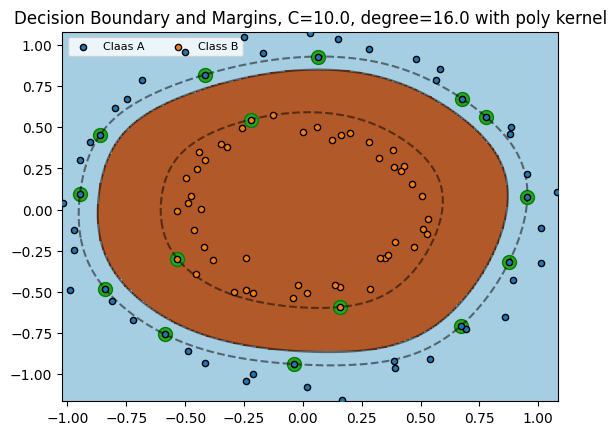

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


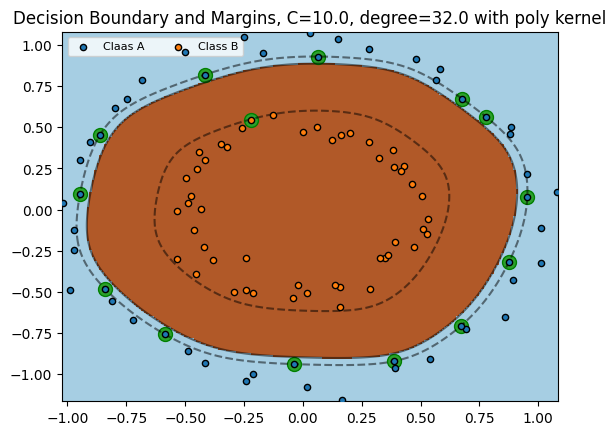

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


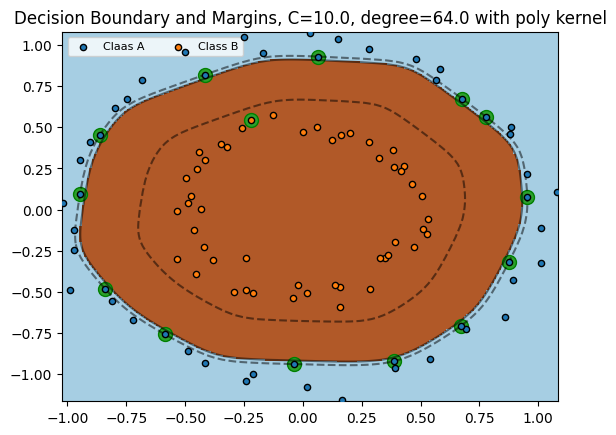

In [64]:
# Use an SVM with a polynomial kernel of different degrees
D = 2 ** np.linspace(0, 6, num=7)
for d in D:
    ## use poly kernel with C=10., gamma=1.0, coef0=1.0 and different degrees
    ### CODE HERE ###
    clf = svm.SVC(kernel='poly', C=10.0, gamma=1.0, coef0=1.0, degree=d)
    
    clf.fit(X, Y)
    plot(X, Y, clf)


/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


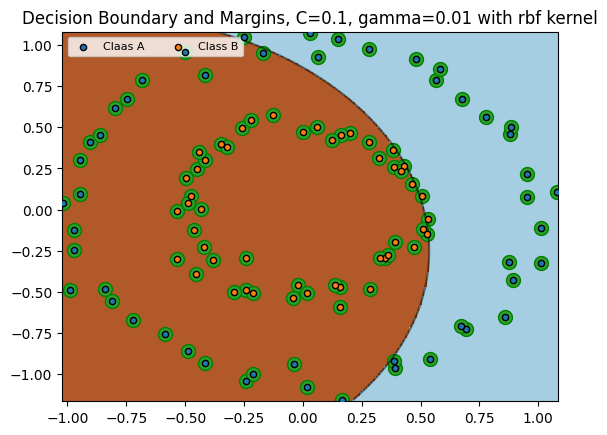

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


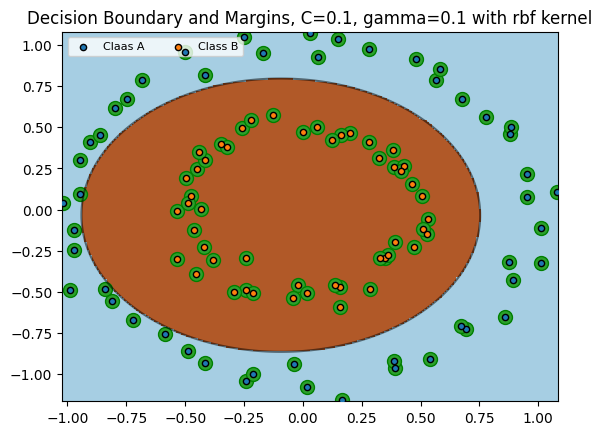

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


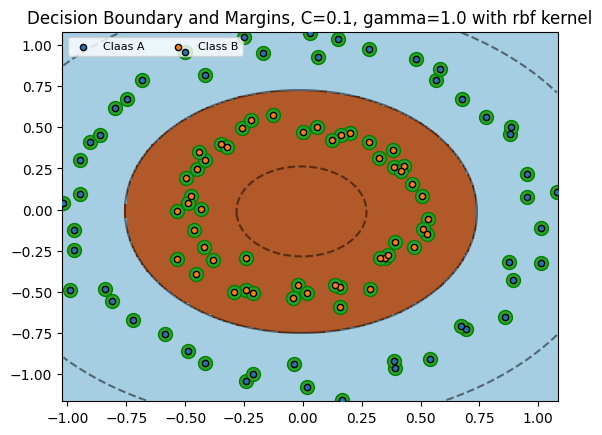

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


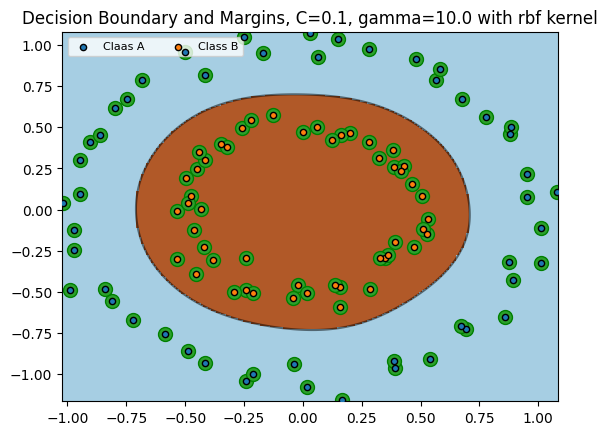

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 8 - Kernel Methods/plots.py:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


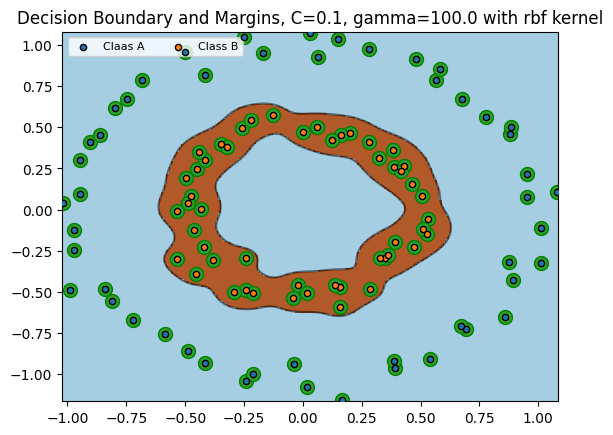

In [65]:
# Use an SVM with an RBF Kernel with differen gammas
G = np.logspace(-2,2,num=5)
for g in G:
    ## use rbf kernel with C=0.1 and different gammas
    ### CODE HERE ###
    clf = svm.SVC(kernel='rbf', C=0.1, gamma=g)
    
    clf.fit(X, Y)
    plot(X, Y, clf)

**!!!** It is important to choose appropriate parameters for the kernel function.

**Question** For the given dataset, which kernel would you consider to be the best one? If you choose the polynomial kernel, which degree would be the best? If you choose the RBF kernel, which gamma would be the best? <br>
`Answer`: For the given dataset the polynomial kernel would be the best suitable, since the intuitive decision boundary has the shape of an ellipse, that corresponds to the polynomial of degree 2. Select the best model, use the mean accuracy on K-fold cross validated parameters.

Let's first look at K-Fold cross validation for the RBF kernel.

In [67]:
# K-Fold cross validation for searching for the parameters gamma and C of an SVM based on an RBF kernel.
from helpers import do_cross_validation, fold_indices

# seach in log space
grid_search_c = np.logspace(-4, 10, num=15)
grid_search_gamma = np.logspace(-9, 5, num=15)

#save the accuracies for all combinations of hyperparameters
grid_val = np.zeros((len(grid_search_c), len(grid_search_gamma)))

# Perform 4 fold cross validation
k_fold = 4
k_fold_ind = fold_indices(X.shape[0], k_fold)

for i, c in enumerate(grid_search_c):
    for j, g in enumerate(grid_search_gamma):
        print('Evaluating for C:{} gamma:{} ...'.format(c, g))
        
        ## call SVM with c,g as params.
        ### CODE HERE ####
        clf = svm.SVC(kernel='rbf', C=c, gamma=g)
        
        acc = np.zeros(k_fold)
        ## do cross validation
        for k in range(k_fold):
            acc[k] = do_cross_validation(clf, k, k_fold_ind, X, Y)
            
        ## fill out the grid_val by computing the mean accuracy from k_fold runs.
        ### CODE HERE ####
        grid_val[i,j] = np.mean(acc)


Evaluating for C:0.0001 gamma:1e-09 ...
Evaluating for C:0.0001 gamma:1e-08 ...
Evaluating for C:0.0001 gamma:1e-07 ...
Evaluating for C:0.0001 gamma:1e-06 ...
Evaluating for C:0.0001 gamma:1e-05 ...
Evaluating for C:0.0001 gamma:0.0001 ...
Evaluating for C:0.0001 gamma:0.001 ...
Evaluating for C:0.0001 gamma:0.01 ...
Evaluating for C:0.0001 gamma:0.1 ...
Evaluating for C:0.0001 gamma:1.0 ...
Evaluating for C:0.0001 gamma:10.0 ...
Evaluating for C:0.0001 gamma:100.0 ...
Evaluating for C:0.0001 gamma:1000.0 ...
Evaluating for C:0.0001 gamma:10000.0 ...
Evaluating for C:0.0001 gamma:100000.0 ...
Evaluating for C:0.001 gamma:1e-09 ...
Evaluating for C:0.001 gamma:1e-08 ...
Evaluating for C:0.001 gamma:1e-07 ...
Evaluating for C:0.001 gamma:1e-06 ...
Evaluating for C:0.001 gamma:1e-05 ...
Evaluating for C:0.001 gamma:0.0001 ...
Evaluating for C:0.001 gamma:0.001 ...
Evaluating for C:0.001 gamma:0.01 ...
Evaluating for C:0.001 gamma:0.1 ...
Evaluating for C:0.001 gamma:1.0 ...
Evaluating fo

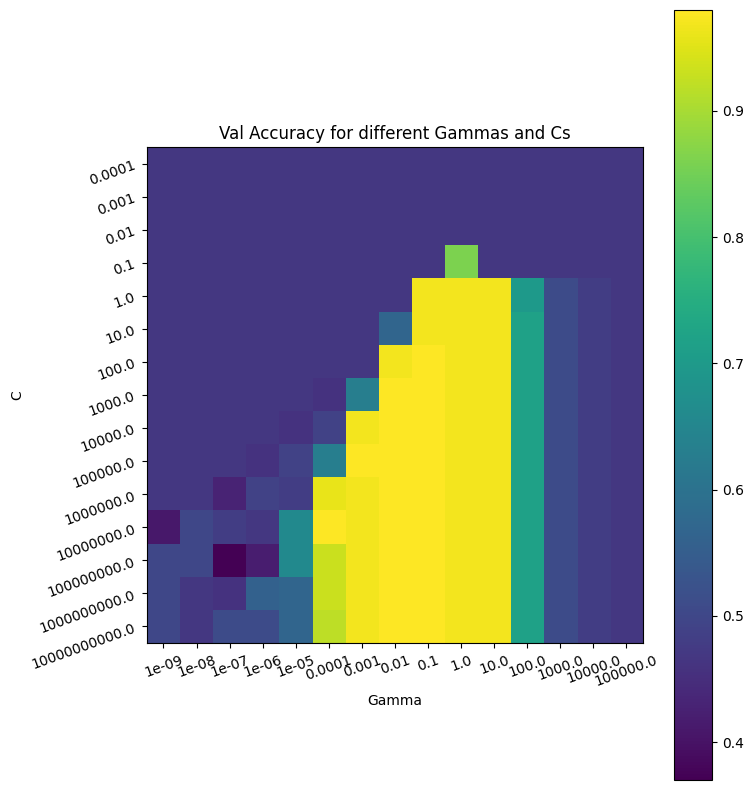

Best acc:0.98
Best Params- C:100.0, Gamma:0.1


In [68]:
from plots import plot_cv_result_rbf
## show all results and the best one
plot_cv_result_rbf(grid_val,grid_search_c,grid_search_gamma)
print('Best acc:{}'.format(np.max(grid_val)))
## best params
cin,gin = np.unravel_index(np.argmax(grid_val),grid_val.shape)
print('Best Params- C:{}, Gamma:{}'.format(grid_search_c[cin],grid_search_gamma[gin]))

The above heatmap shows the accuracies for different gamma and C values. The best parameter values are used on the test set.   
**Question** Is there a relation between C and gamma? <br>
**Hint**: Look at how increasing one value changes the other in the heatmap. <br>
`Answer`: These parameters seem to be inversely correlated, according to the plot. The more importance is given to the errors $\xi_i$, the less slack is allowed and $C$ increases, in attempt to minimize the loss. An increased $\gamma$ value tightens the width of prediction around a single point and eventually increases the errors in prediction, because of overfitting and $C$ becomes smaller to allow more misclassification to counteract the phenomenon. A lower $\gamma$ leads to underfitting, and one can thus use a high $C$  to prevent misclassifications. Therefore, there is an inverse correlation of these hyperparameters, when trying to minimize the loss of the model.

Let's now perform K-Fold cross validation for the polynominal kernel.

In [70]:
# K-Fold cross validation for searching for the degree and parameter C of an SVM based on an RBF kernel.
from helpers import do_cross_validation, fold_indices

grid_search_c = np.logspace(-5,5,num=11)
grid_search_degree = 2 ** np.linspace(0, 8, num=9)

#save the accuracies for all combinations of hyperparameters
grid_val = np.zeros((len(grid_search_c),len(grid_search_degree)))

# Perform 4 fold cross validation
k_fold = 4
k_fold_ind = fold_indices(X.shape[0],k_fold)

for i, c in enumerate(grid_search_c):
    for j, d in enumerate(grid_search_degree):
        print('Evaluating for C:{} degree:{} ...'.format(c, d))
        
        ## call SVM with c,d as params.
        ### CODE HERE ####
        clf = svm.SVC(kernel='poly', C=c, degree=d)
        
        acc = np.zeros(k_fold)
        # do cross validation
        for k in range(k_fold):
            acc[k] = do_cross_validation(clf,k,k_fold_ind,X,Y)
            
        ## fill out the grid_val by computing the mean accuracy from k_fold runs. 
        ### CODE HERE ####
        grid_val[i,j] = np.mean(acc)
        

Evaluating for C:1e-05 degree:1.0 ...
Evaluating for C:1e-05 degree:2.0 ...
Evaluating for C:1e-05 degree:4.0 ...
Evaluating for C:1e-05 degree:8.0 ...
Evaluating for C:1e-05 degree:16.0 ...
Evaluating for C:1e-05 degree:32.0 ...
Evaluating for C:1e-05 degree:64.0 ...
Evaluating for C:1e-05 degree:128.0 ...
Evaluating for C:1e-05 degree:256.0 ...
Evaluating for C:0.0001 degree:1.0 ...
Evaluating for C:0.0001 degree:2.0 ...
Evaluating for C:0.0001 degree:4.0 ...
Evaluating for C:0.0001 degree:8.0 ...
Evaluating for C:0.0001 degree:16.0 ...
Evaluating for C:0.0001 degree:32.0 ...
Evaluating for C:0.0001 degree:64.0 ...
Evaluating for C:0.0001 degree:128.0 ...
Evaluating for C:0.0001 degree:256.0 ...
Evaluating for C:0.001 degree:1.0 ...
Evaluating for C:0.001 degree:2.0 ...
Evaluating for C:0.001 degree:4.0 ...
Evaluating for C:0.001 degree:8.0 ...
Evaluating for C:0.001 degree:16.0 ...
Evaluating for C:0.001 degree:32.0 ...
Evaluating for C:0.001 degree:64.0 ...
Evaluating for C:0.001 d

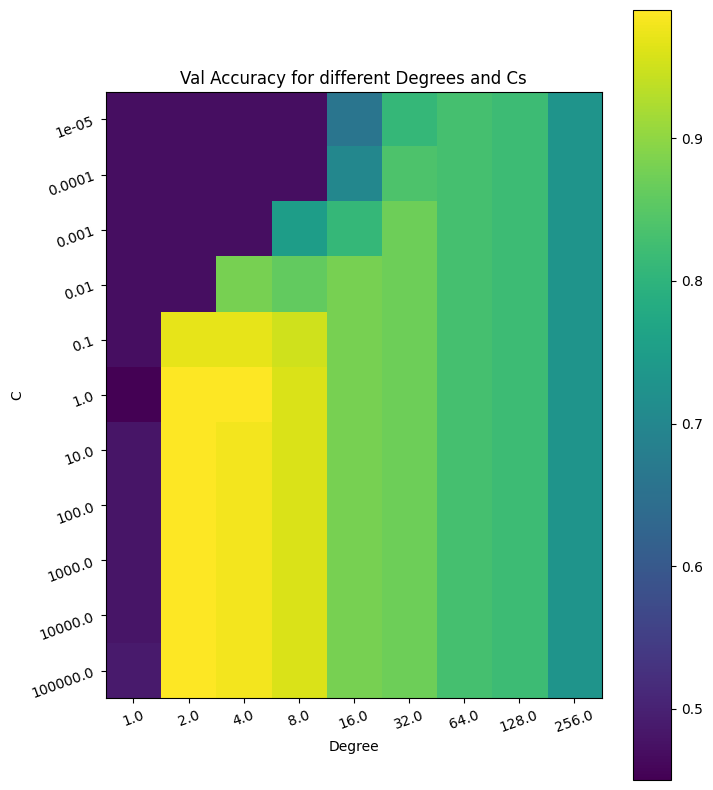

Best acc:0.99
Best Params- C:1.0, Degree:2.0


In [71]:
from plots import plot_cv_result_poly
## show all results and the best one
plot_cv_result_poly(grid_val, grid_search_c, grid_search_degree)
print('Best acc:{}'.format(np.max(grid_val)))
## best params
cin,gin = np.unravel_index(np.argmax(grid_val),grid_val.shape)
print('Best Params- C:{}, Degree:{}'.format(grid_search_c[cin],grid_search_degree[gin]))